# Plot Figure 2

In [2]:
import lamindb as ln
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_theme()
%config InlineBackend.figure_formats = ['svg']

In [8]:
results_df = pd.read_csv('Rjatd7RKmRnlzCd9Wrth.tsv', sep='\t', header=None)
results_df.columns = ["experiment", "epoch", "time"]
results_df

,experiment,epoch,time
0,h5py_sp,0,2.906638
1,h5py_sp,1,2.880476
2,h5py_sp,2,2.879070
3,h5py_sp,3,2.874755
4,h5py_sp_rand,0,6.321198
...,...,...,...
87,zarrV2tensorstore_dense_chunk,3,4.921915
88,zarrV2tensorstore_dense_chunk_rand,0,60.937075
89,zarrV2tensorstore_dense_chunk_rand,1,62.495638
90,zarrV2tensorstore_dense_chunk_rand,2,62.072053


In [9]:
results_df.experiment.unique()

array(['h5py_sp', 'h5py_sp_rand', 'soma_sp', 'soma_sp_rand', 'h5py_dense',
       'h5py_dense_rand', 'zarr_sp', 'zarr_sp_rand', 'zarr_dense',
       'zarr_dense_rand', 'zarr_dense_chunk', 'zarr_dense_chunk_rand',
       'parquet', 'parquet_rand', 'polars', 'parquet_chunk',
       'parquet_chunk_rand', 'arrow', 'arrow_chunk',
       'zarrV3tensorstore_dense_chunk',
       'zarrV3tensorstore_dense_chunk_rand',
       'zarrV2tensorstore_dense_chunk',
       'zarrV2tensorstore_dense_chunk_rand'], dtype=object)

We remove `parquet_rand`, because the benchmark isn't meaningful. Randomized sampling from parquet only works in combination with chunking, which is `parquet_chunk.`

In [10]:
df = results_df.loc[results_df.experiment != "parquet_rand"].copy()

def fix_categoricals(df, categorical="experiment"):
    """Is inplace."""
    df[['backend', 'config']] = df[categorical].str.split('_', n=1, expand=True)
    df.loc[df.backend == "polars", "backend"] = "polars (parquet)"
    df.loc[df.backend == "polars (parquet)", "config"] = "dense"
    df.loc[df[categorical] == "arrow", "config"] = "dense"
    df.loc[df[categorical] == "arrow_chunk", "config"] = "dense_chunk"
    df.loc[df[categorical] == "parquet", "config"] = "dense"
    df.loc[df[categorical] == "parquet_chunk", "config"] = "dense_chunk"
    df.loc[df[categorical] == "parquet_chunk_rand", "config"] = "dense_chunk_rand"
    df.backend = df.backend.str.replace("zarrV2tensorstore", "tensorstore (zarr v2)")
    df.backend = df.backend.str.replace("zarrV3tensorstore", "tensorstore (zarr v3)")
    df.backend = df.backend.str.replace("soma", "tiledbsoma")
    df.config = df.config.str.replace("sp", "sparse")
    df.backend = pd.Categorical(df.backend)

fix_categoricals(df)

df["samples_per_second"] = 142000 / df.time

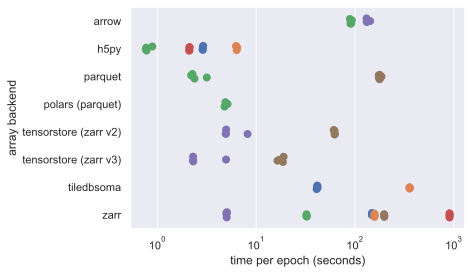

In [11]:
def plot_time(ax=None):
    if ax is None:
        plt.figure(figsize=(6, 4))    
    ax = sns.stripplot(x='time', y='backend', hue='config', data=df, size=8, ax=ax, legend=None)
    ax.set_xscale("log")
    ax.set_xlabel('time per epoch (seconds)')
    ax.set_ylabel('array backend')

plot_time()

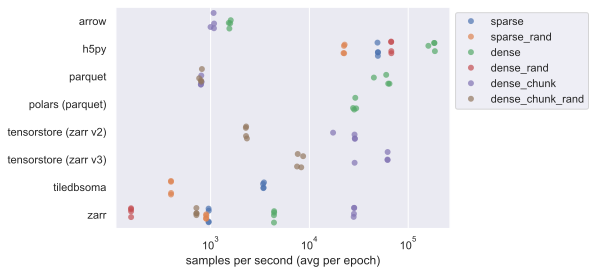

In [12]:
def plot_velocity(ax=None):
    if ax is None:
        plt.figure(figsize=(6, 4))
    ax = sns.stripplot(x='samples_per_second', y='backend', hue='config', data=df, size=6, alpha=0.7, jitter=0.3, ax=ax)
    ax.legend(title=None)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_xscale("log")
    ax.set_xlabel('samples per second (avg per epoch)')
    ax.set_ylabel(None)

plot_velocity()

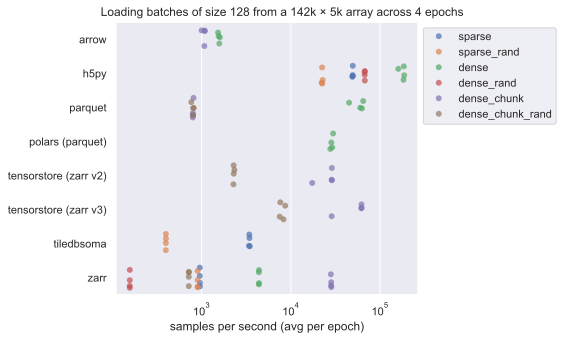

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plot_velocity(ax)
plt.suptitle('Loading batches of size 128 from a 142k × 5k array across 4 epochs', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 1.04])

In [ ]:
storage_artifact = ln.Artifact.filter(uid="beun8jVU4A7CPRXl4fxz").one()

In [ ]:
storage_artifact.describe()

In [ ]:
df_storage = storage_artifact.load()

In [ ]:
df_storage = pd.read_parquet(

In [ ]:
fix_categoricals(df_storage, categorical="storage")

In [ ]:
df_storage

In [ ]:
def plot_storage_size(ax=None):
    if ax is None:
        plt.figure(figsize=(6, 4))
    ax = sns.stripplot(x='size', y='backend', hue='config', data=df_storage, size=6, alpha=0.9, ax=ax)
    ax.legend(title=None)
    ax.set_xlabel('size (GB)')
    ax.set_ylabel(None)

plot_storage_size()

In [ ]:
def plot_storage_n_objects(ax=None):
    if ax is None:
        plt.figure(figsize=(6, 4))
    ax = sns.stripplot(x='n_objects', y='backend', hue='config', data=df_storage, size=6, alpha=0.9, ax=ax, legend=False)
    # ax.legend(title=None)
    ax.set_ylabel(None)
    ax.set_yticks([])

plot_storage_n_objects()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plot_storage_size(axs[0])
plot_storage_n_objects(axs[1])
plt.suptitle('Loading batches of size 128 from a 142k × 5k array across 4 epochs', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 1.04])

In [ ]:
ln.finish(i_saved_the_notebook=True)